### NOTE: If running from colab and you have uploaded the folder ERA-V1/era_v1_session7_pankaja then uncomment the two cells below and run before moving on to Install libraries

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# %cd /gdrive/My\ Drive/ERA-V1/era_v1_session7_pankaja

/gdrive/My Drive/ERA-V1/era_v1_session7_pankaja


### Target:
-  Add Batch-norm to increase model efficiency.

### Results:
-   Parameters: 5,088
-   Best Train Accuracy: 99.02%
-   Best Test Accuracy: 99.03%

### Analysis:
-   There is slight increase in the number of parameters, as batch norm stores a specific mean and std deviation for each layer.
-   Model overfitting problem is rectified to an extent. But, we have not reached the target test accuracy 99.40%.


# Install Libraries


In [3]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

Let's first import all the necessary libraries

In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from tqdm import tqdm
from torchsummary import summary

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt

from model import Model_3, download_model_data, create_data_loader, train_and_predict
from utils import get_device, plot_metrics

# Model_3 - in model.py


# Model Summary
 To view and to understand Model Trainable parameteres

In [5]:

device = get_device()
model = Model_3().to(device)
summary(model, input_size=(1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
           Dropout-3            [-1, 8, 26, 26]               0
              ReLU-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
           Dropout-7           [-1, 16, 24, 24]               0
              ReLU-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
      BatchNorm2d-11            [-1, 8, 12, 12]              16
          Dropout-12            [-1, 8, 12, 12]               0
             ReLU-13            [-1, 8, 12, 12]               0
           Conv2d-

# The Model


In [6]:
model.eval()

Model_3(
  (conv1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): ReLU()
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.1, inplace=False)
    (7): ReLU()
  )
  (trans1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace

## Load and Prepare Dataset

MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels

We load the PIL images using torchvision.datasets.MNIST, while loading the image we transform he data to tensor and normalize the images with mean and std deviation of MNIST images.

Data tasks:
- transformers
- data download
- train and test split

In [7]:
torch.manual_seed(1)
batch_size = 128
# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
ds_train, ds_test = download_model_data()
train_loader = torch.utils.data.DataLoader(ds_train, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(ds_test, batch_size=batch_size, shuffle=False, **kwargs)


CUDA Available? True


## Train and test -  Model_3

Let's train and test our model

In [8]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

# load model to device and start the training
model =  Model_3().to(device)
epochs = 15
lr = 0.01

train_losses3, train_acc3, test_losses3, test_acc3 = train_and_predict(model, device,
                                                                   train_loader=train_loader,
                                                                   test_loader=test_loader,
                                                                   num_epochs=epochs, lr=lr)

Epoch 1


Train: Loss=0.3501 Batch_id=468 Accuracy=82.75: 100%|██████████| 469/469 [00:20<00:00, 23.33it/s]


Test set: Average loss: 0.2333, Accuracy: 9607/10000 (96.07%)

Epoch 2


Train: Loss=0.3090 Batch_id=468 Accuracy=94.91: 100%|██████████| 469/469 [00:19<00:00, 23.67it/s]


Test set: Average loss: 0.1181, Accuracy: 9753/10000 (97.53%)

Epoch 3


Train: Loss=0.1021 Batch_id=468 Accuracy=96.29: 100%|██████████| 469/469 [00:21<00:00, 22.07it/s]


Test set: Average loss: 0.1004, Accuracy: 9774/10000 (97.74%)

Epoch 4


Train: Loss=0.1206 Batch_id=468 Accuracy=96.84: 100%|██████████| 469/469 [00:21<00:00, 21.88it/s]


Test set: Average loss: 0.0833, Accuracy: 9808/10000 (98.08%)

Epoch 5


Train: Loss=0.1074 Batch_id=468 Accuracy=97.08: 100%|██████████| 469/469 [00:19<00:00, 23.61it/s]


Test set: Average loss: 0.0756, Accuracy: 9820/10000 (98.20%)

Epoch 6


Train: Loss=0.0747 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:20<00:00, 22.83it/s]


Test set: Average loss: 0.0669, Accuracy: 9825/10000 (98.25%)

Epoch 7


Train: Loss=0.1929 Batch_id=468 Accuracy=97.42: 100%|██████████| 469/469 [00:21<00:00, 21.51it/s]


Test set: Average loss: 0.0590, Accuracy: 9841/10000 (98.41%)

Epoch 8


Train: Loss=0.1504 Batch_id=468 Accuracy=97.54: 100%|██████████| 469/469 [00:20<00:00, 23.13it/s]


Test set: Average loss: 0.0581, Accuracy: 9846/10000 (98.46%)

Epoch 9


Train: Loss=0.0764 Batch_id=468 Accuracy=97.65: 100%|██████████| 469/469 [00:20<00:00, 23.12it/s]


Test set: Average loss: 0.0548, Accuracy: 9857/10000 (98.57%)

Epoch 10


Train: Loss=0.0952 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:22<00:00, 21.16it/s]


Test set: Average loss: 0.0565, Accuracy: 9840/10000 (98.40%)

Epoch 11


Train: Loss=0.0761 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:19<00:00, 23.94it/s]


Test set: Average loss: 0.0521, Accuracy: 9864/10000 (98.64%)

Epoch 12


Train: Loss=0.0798 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:20<00:00, 22.93it/s]


Test set: Average loss: 0.0481, Accuracy: 9876/10000 (98.76%)

Epoch 13


Train: Loss=0.0273 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:19<00:00, 23.72it/s]


Test set: Average loss: 0.0438, Accuracy: 9876/10000 (98.76%)

Epoch 14


Train: Loss=0.1069 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:19<00:00, 23.72it/s]


Test set: Average loss: 0.0432, Accuracy: 9882/10000 (98.82%)

Epoch 15


Train: Loss=0.0649 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:20<00:00, 22.94it/s]


Test set: Average loss: 0.0455, Accuracy: 9870/10000 (98.70%)



### Plot the train and test losses and accuracies for Model_3

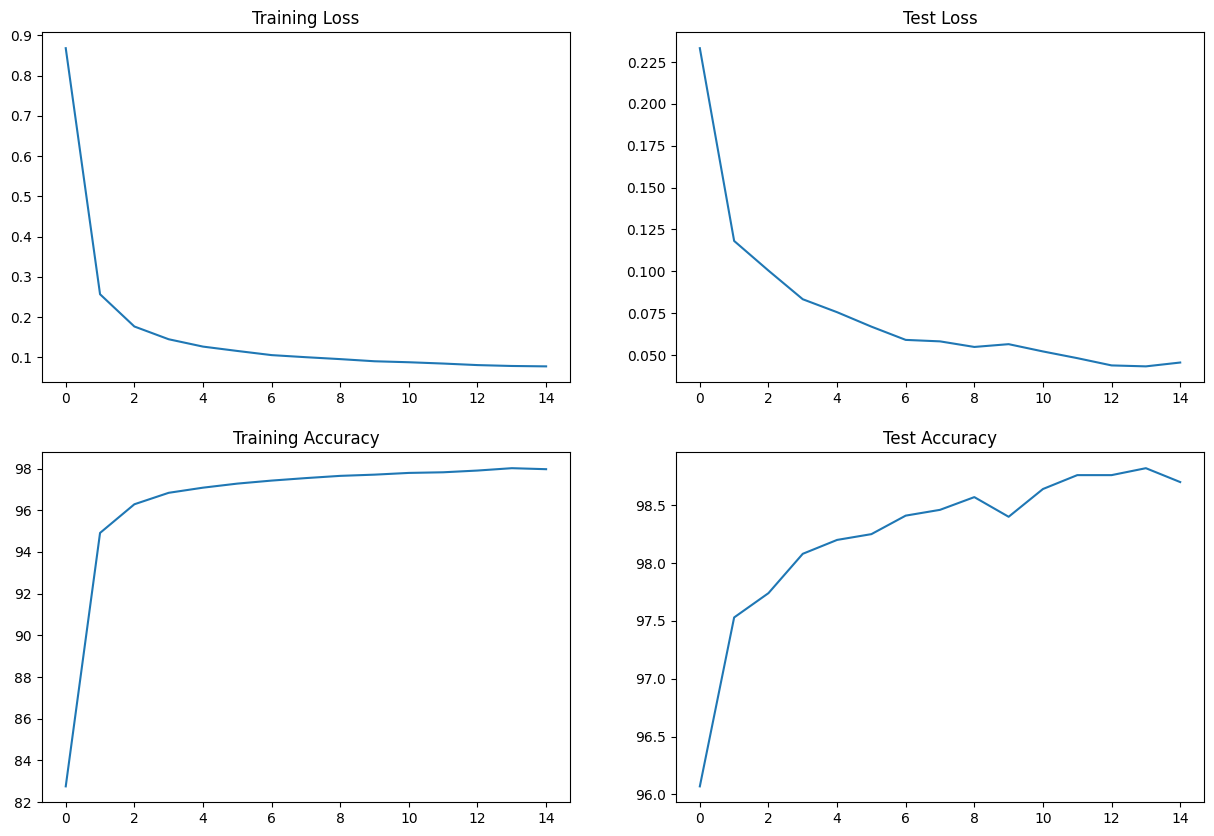

In [9]:
plot_metrics(train_losses3, train_acc3, test_losses3, test_acc3)